# Лабораторная работа №6
## Задание 2

Используя один из игрушечных датасетов, применить алгоритмы улучшения качества и оценки моделей.
Я использую load_wine.

## Перекрестная проверка

In [3]:
import mglearn 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

wine = load_wine()
logreg = LogisticRegression(max_iter=10000)# процесс оптимизации алгоритма не сходится в течение 1000 итераций, поэтому мы используем 10000

scores = cross_val_score(logreg, wine.data, wine.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.97222222 0.91666667 0.91666667 1.         1.        ]


In [4]:
scores = cross_val_score(logreg, wine.data, wine.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, wine.data, wine.target, cv=5, return_train_score=True)
display(res)

Cross-validation scores: [0.97222222 0.91666667 0.91666667 1.         1.        ]
Средняя правильность перекрестной проверки: 0.96


{'fit_time': array([0.39216733, 0.51402736, 0.49894977, 0.53836131, 0.47307062]),
 'score_time': array([0.        , 0.        , 0.00753069, 0.        , 0.        ]),
 'test_score': array([0.97222222, 0.91666667, 0.91666667, 1.        , 1.        ]),
 'train_score': array([0.99295775, 0.99295775, 1.        , 0.99300699, 0.99300699])}

In [5]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())
from sklearn.datasets import load_wine
wine=load_wine()
print("метки wine:\n{}".format(wine.target))

,fit_time,score_time,test_score,train_score
0,0.392167,0.000000,0.972222,0.992958
1,0.514027,0.000000,0.916667,0.992958
2,0.498950,0.007531,0.916667,1.000000
3,0.538361,0.000000,1.000000,0.993007
4,0.473071,0.000000,1.000000,0.993007


Mean times and scores:
 fit_time       0.483315
score_time     0.001506
test_score     0.961111
train_score    0.994386
dtype: float64
метки wine:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, wine.data, wine.target, cv=kfold)))
kfold = KFold(n_splits=3)
print("значения правильности перекрестной проверки :\n{}".format(cross_val_score(logreg, wine.data, wine.target, cv=kfold)))
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, wine.data, wine.target, cv=kfold)))

значения правильности перекрестной проверки:
[0.91666667 0.94444444 0.88888889 0.94285714 1.        ]
значения правильности перекрестной проверки :
[0.01666667 0.74576271 0.18644068]
значения правильности перекрестной проверки:
[0.98333333 0.88135593 0.96610169]


In [7]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, wine.data, wine.target, cv=shuffle_split)
print("значения правильности перекрестной проверки: \n{}".format(scores))

значения правильности перекрестной проверки: 
[0.94382022 0.93258427 0.98876404 0.94382022 0.95505618 0.94382022
 0.97752809 0.97752809 0.8988764  0.94382022]


In [8]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores = cross_val_score(logreg, wine.data, wine.target, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  178
Средняя правильность: 0.96


# Решетчатый поиск

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target, random_state=0)
print("размер обучающего набора:{} размер тестового набора :{}".format(X_train.shape[0], X_test.shape[0]))
best_score =0
for gamma in [0.001, 0.01, 0.1, 1, 10,100]:
    for C in [0.001, 0.01, 0.1, 1, 10,100]:
        
        svm=SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score> best_score:
            best_score=score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("наилучшее значение правильности: {:.2f}".format(best_score))
print("наилучшее значение параметров: {}".format(best_parameters))

размер обучающего набора:133 размер тестового набора :45
наилучшее значение правильности: 0.84
наилучшее значение параметров: {'C': 10, 'gamma': 0.001}


In [10]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test= train_test_split(wine.data,wine.target, random_state=0)

X_train, X_valid, y_train, y_valid= train_test_split(X_trainval, y_trainval,random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10,100]:
    for C in [0.001, 0.01, 0.1, 1, 10,100]:
        
        svm=SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score> best_score:
            best_score=score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score=svm.score(X_test, y_test)

            
print("лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("наилучшее значение параметров: {}".format(best_parameters))
print("правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 99 размер проверочного набора: 34 размер тестового набора:45

лучшее значение правильности на проверочном наборе: 0.79
наилучшее значение параметров: {'C': 10, 'gamma': 0.001}
правильность на тестовом наборе с наилучшими параметрами: 0.84


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
for gamma in [0.001,0.01, 0.1, 1, 10,100]:
    for C in [0.001,0.01, 0.1, 1, 10,100]:
        
        svm=SVC(gamma=gamma, C=C)
        
        
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=10)
        score=np.mean(scores)
        
        if score> best_score:
            best_score=score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.001)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={'C':[0.001,0.01, 0.1, 1, 10,100],
          'gamma': [0.001,0.01, 0.1, 1, 10,100]}
grid_search = GridSearchCV(SVC(),param_grid,cv=10)
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [13]:
print("правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

правильность на тестовом наборе: 0.82


In [14]:
print("наилучшее значение параметров: {}".format(grid_search.best_params_))
print("наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))
print("наилучшая модель:\n{}".format(grid_search.best_estimator_))

наилучшее значение параметров: {'C': 100, 'gamma': 0.001}
наилучшее значение кросс-валидац. правильности: 0.76
наилучшая модель:
SVC(C=100, gamma=0.001)


In [15]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002945,0.005084,0.000459,0.000944,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,11
1,0.001854,0.003638,0.001858,0.004046,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,11
2,0.003316,0.004240,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,11
3,0.001582,0.004747,0.003166,0.005983,0.001,1,"{'C': 0.001, 'gamma': 1}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,11
4,0.003168,0.006336,0.000000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.357143,0.357143,0.357143,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.376374,0.012589,11


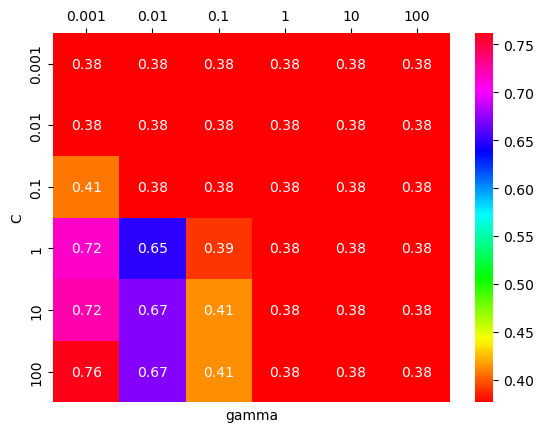

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6,6)

ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()
plt.show()

## Метрики модели

In [17]:
from sklearn.datasets import load_wine
wine=load_wine()
X = wine.data
y = wine.target
y_binary = (y == 0)

X_train,X_test,y_train,y_test = train_test_split(X, y_binary , random_state=0)

In [18]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('Уникальные спрогнозированные метки: {}'.format(np.unique(pred_most_frequent)))
print('правильность на тестовом наборе : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
правильность на тестовом наборе : 0.64


In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('правильность на тестовом наборе: {:.2f}'.format(tree.score(X_test, y_test)))

правильность на тестовом наборе: 0.98


In [20]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('правильность dummy : {:.2f}'.format(dummy.score(X_test, y_test)))
logreg  = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('правильность logreg : {:.2f}'.format(logreg.score(X_test, y_test)))

правильность dummy : 0.64
правильность logreg : 0.98


In [21]:
from sklearn.metrics import confusion_matrix
confusion= confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[29  0]
 [ 1 15]]


In [38]:
import mglearn


In [24]:
print(" Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n Дамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\n Дерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\n Логическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

 Наиболее часто встречающийся класс:
[[29  0]
 [16  0]]

 Дамми-модель:
[[29  0]
 [16  0]]

 Дерево решений:
[[29  0]
 [ 1 15]]

 Логическая регрессия:
[[29  0]
 [ 1 15]]


In [25]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1- мера Дамми-модель: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1- мера Дерево решений: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1- мера Логическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))


f1-мера наибольшая частота: 0.00
f1- мера Дамми-модель: 0.00
f1- мера Дерево решений: 0.97
f1- мера Логическая регрессия: 0.97


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.64      1.00      0.78        29
        nine       0.00      0.00      0.00        16

    accuracy                           0.64        45
   macro avg       0.32      0.50      0.39        45
weighted avg       0.42      0.64      0.51        45



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(gamma=.05).fit(X_train, y_train)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

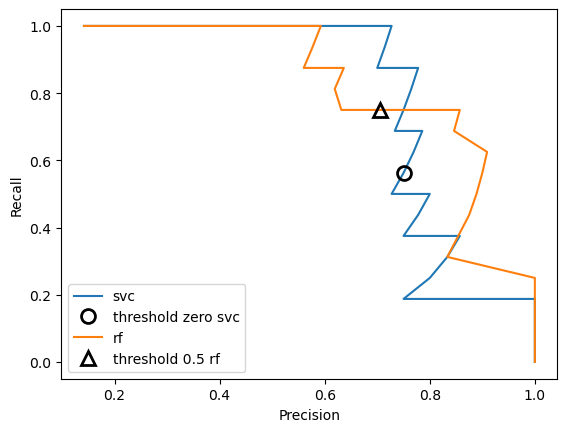

In [70]:
from sklearn.ensemble import RandomForestClassifier 
 
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=2) 
rf.fit(X_train, y_train) 
 
# RandomForestClassifier has predict_proba, but not decision_function 
precision_rf, recall_rf, thresholds_rf = precision_recall_curve( 
    y_test, rf.predict_proba(X_test)[:, 1]) 
 
plt.plot(precision, recall, label="svc") 
close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf") 
 
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5)) 
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2) 
plt.xlabel("Precision") 
plt.ylabel("Recall") 
plt.legend(loc="best")


In [71]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("средняя точность rrandom forest: {:.3f}".format(ap_rf))
print("средняя точность svc: {:.3f}".format(ap_svc))

средняя точность rrandom forest: 0.838
средняя точность svc: 0.819


In [72]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred= lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.978
confusion matrix:
[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]


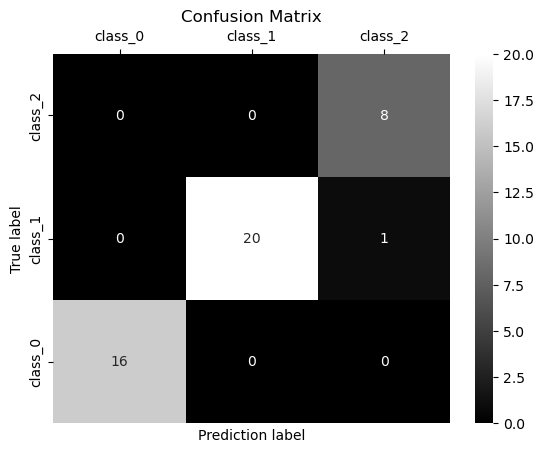

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, xticklabels=wine.target_names, yticklabels=wine.target_names, cmap='gray')
ax.set(xlabel="Prediction label", ylabel="True label")
ax.xaxis.tick_top()
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()
plt.show()


In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.98        21
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [33]:

print("Micro average f1 score: {:.3f}".format(f1_score(y_test,pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test,pred, average="macro")))

Micro average f1 score: 0.978
Macro average f1 score: 0.972


In [34]:
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), X, y)))
explicit_accuracy = cross_val_score(SVC(), X, y, scoring='accuracy')
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), X, y, scoring='roc_auc')
print("AUC: {}".format(roc_auc))


Метрика качества по умолчанию: [0.88888889 0.88888889 0.88888889 0.88888889 0.88888889]
Метрика качества явно заданная правильность: [0.88888889 0.88888889 0.88888889 0.88888889 0.88888889]
AUC: [0.9225  0.95375 0.9325  0.945   0.94625]


In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid= {'gamma': [0.0001,0.001, 0.01, 0.1, 1,10]}
grid = GridSearchCV(SVC(), param_grid= param_grid)
grid.fit(X_train, y_train)
print("решетчатый поиск с использованием правильности")
print("наилучшие параметры:", grid.best_params_)
print("наилучшее значение перекр проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("правильность на  тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

решетчатый поиск с использованием правильности
наилучшие параметры: {'gamma': 0.0001}
наилучшее значение перекр проверки (правильность): 0.894
AUC на тестовом наборе: 0.922
правильность на  тестовом наборе: 0.867


In [37]:
grid = GridSearchCV(SVC(), param_grid= param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("решетчатый поиск AUC")
print("наилучшие параметры:", grid.best_params_)
print("наилучшее значение перекр проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("правильность на  тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

решетчатый поиск AUC
наилучшие параметры: {'gamma': 0.001}
наилучшее значение перекр проверки (правильность): 0.936
AUC на тестовом наборе: 0.954
правильность на  тестовом наборе: 0.954


Средняя правильность перекрестной проверки: 0.96, что является усредненной оценкой точности модели на различных разбиениях данных.

Модель демонстрирует высокие показатели точности как на тренировочных (от 0.993 до 1), так и на тестовых данных (от 0.916 до 1). Средняя точность на тестовых данных составляет 0.96, что также говорит о хорошей производительности модели на новых данных

Оценка на тестовом наборе данных с использованием перекрестной проверки позволяет убедиться в том, что модель имеет хорошую производительность на новых данных, что важно для обеспечения надежности прогнозов. Значение правильности на тестовом наборе (0.84) довольно близко к значению, полученному на проверочном наборе (0.79), что указывает на стабильность модели при работе с разными подмножествами данных. Это подтверждает, что выбранные параметры {'C': 10, 'gamma': 0.001} работают хорошо и позволяют модели давать достаточно точные прогнозы на новых данных.

Dummy модель показала точность 0.64. Это простейшая модель, которая может случайным образом предсказывать результаты. Точность 0.64 говорит о том, что другие модели должны превзойти это значение, чтобы считаться эффективными.

Модель логистической регрессии (logreg) показала высокую точность 0.98. Это свидетельствует о том, что данная модель хорошо подходит для решения задачи классификации данных.

Random Forest и SVC (Support Vector Classifier) показали средние точности 0.838 и 0.819 соответственно. Обе эти модели могут быть доработаны или подобраны другие параметры для улучшения их производительности.

Из этих результатов видно, что logreg имеет самую высокую точность среди представленных моделей, в то время как остальные модели требуют дополнительной работы для улучшения их эффективности в данной задаче классификации.